In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ft_testfunction import local_xD
from freeze_thaw import FreezeThaw, init_configs,update_configs

0.9483333333333333g 1000/1000
0.9483333333333333
1.2750509891363877baskets 5/13               
1.2750509891363877
0.8019834277641651
0.8019834277641651
0.8665610222213035
0.8665610222213035
0.8805015827178948
0.8805015827178948
0.9036423301785595
0.9036423301785595
0.7216646272955494
0.7216646272955494
0.8994176177577844
0.8994176177577844
1.2066588777059033
1.2066588777059033
0.9354949153993681
0.9354949153993681
1.0355318476555664
1.0355318476555664
0.4115282110624988
0.4115282110624988
1.280052385830289
1.280052385830289
0.8905931757878943
0.8905931757878943
0.7331100821959254
0.7331100821959254
0.8605784560912404
0.8605784560912404
0.9619412765439781
0.9619412765439781
0.814392022638028
0.814392022638028
0.8865361951675346
0.8865361951675346
1.0272196795224309
1.0272196795224309
0.780800152265436
0.780800152265436
0.8926140759774293
0.8926140759774293
0.9441073191826951
0.9441073191826951
1.4720617093743602
1.4720617093743602
0.838387294458003
0.838387294458003
0.9607950645981608
0

C:\Users\Amega\AppData\Local\Temp\ipykernel_29648\3186692429.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(mean_prediction[int(new_config*100-100)])
C:\Users\Amega\AppData\Local\Temp\ipykernel_29648\3186692429.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[0].hlines(mean_prediction[int(new_config*100-100)],1,100,colors='r')
C:\Users\Amega\AppData\Local\Temp\ipykernel_29648\3186692429.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[0].h

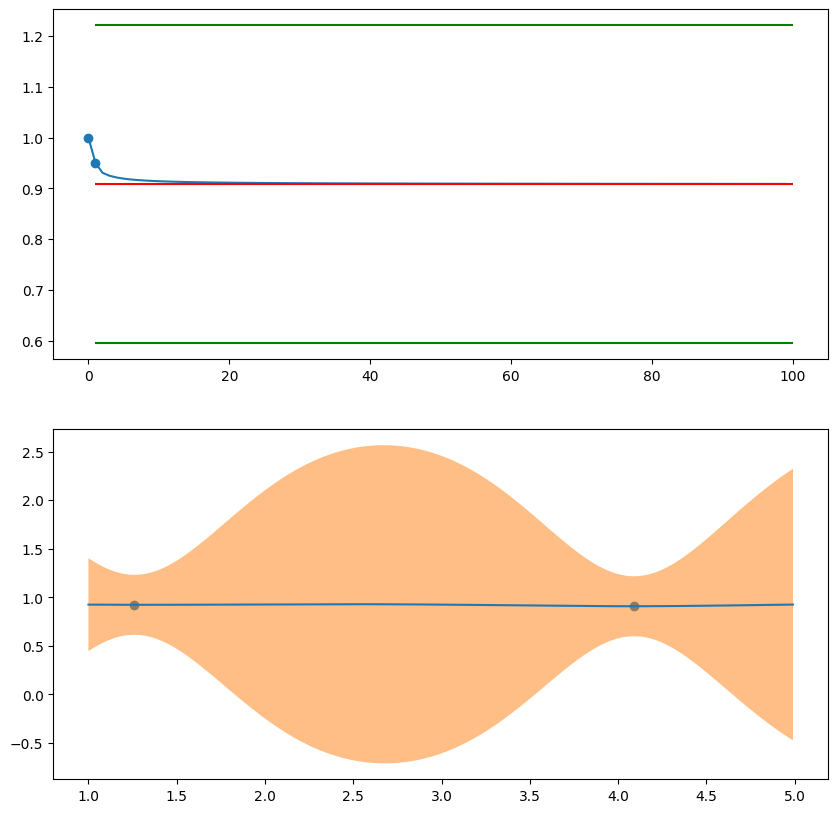

0.9550000000000001g 1000/1000
0.9550000000000001
0.6776502238219436baskets 6/13               
0.6776502238219436
1.1879815271059846
1.1879815271059846
0.923544826983508
0.923544826983508
0.9661596438124593
0.9661596438124593
1.1956116435035486
1.1956116435035486
0.6993760298407637
0.6993760298407637
1.0625452396154564
1.0625452396154564
0.8105007888268361
0.8105007888268361
0.6933812008448403
0.6933812008448403
1.0402772503788211
1.0402772503788211
0.6538135340493925
0.6538135340493925
1.08134500588169
1.08134500588169
0.5130203481005151
0.5130203481005151
1.0184456262920913
1.0184456262920913
1.1163320989874994
1.1163320989874994
1.011506513251123
1.011506513251123
0.9505872344173543
0.9505872344173543
0.9001463950618985
0.9001463950618985
1.1181377300159103
1.1181377300159103
0.9891789503141005
0.9891789503141005
1.0017456143515955
1.0017456143515955
1.0282903067512366
1.0282903067512366
1.1671604340766302
1.1671604340766302
0.8615595252956554
0.8615595252956554
1.0128180731798728
1

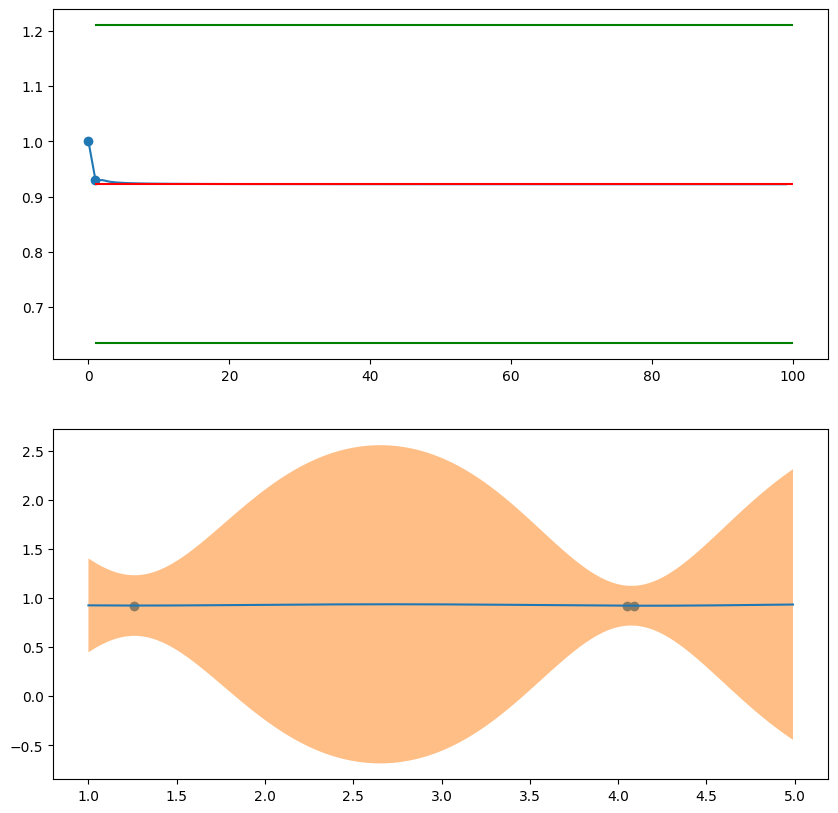

0.9570000000000001g 1000/1000
0.9570000000000001
1.0190521405691235baskets 7/13               
1.0190521405691235
1.170329497942383
1.170329497942383
1.1568046991642926
1.1568046991642926
0.940495495586842
0.940495495586842
0.7390217772713696
0.7390217772713696
1.1089913897555543
1.1089913897555543
0.9095328622313117
0.9095328622313117
0.8422518273690937
0.8422518273690937
1.125492361802695
1.125492361802695
0.6618222027589847
0.6618222027589847
0.971875446739889
0.971875446739889
0.820160574968042
0.820160574968042
0.9828470026936538
0.9828470026936538
1.2076675447262257
1.2076675447262257
0.9441371701828086
0.9441371701828086
0.868881377099639
0.868881377099639
1.0103781913783
1.0103781913783
0.9397643262911802
0.9397643262911802
1.0622099298535066
1.0622099298535066
1.176674204264284
1.176674204264284
0.8293008882715164
0.8293008882715164
0.873320910651254
0.873320910651254
1.036667379405474
1.036667379405474
0.9709331544329028
0.9709331544329028
0.809603941588275
0.809603941588275


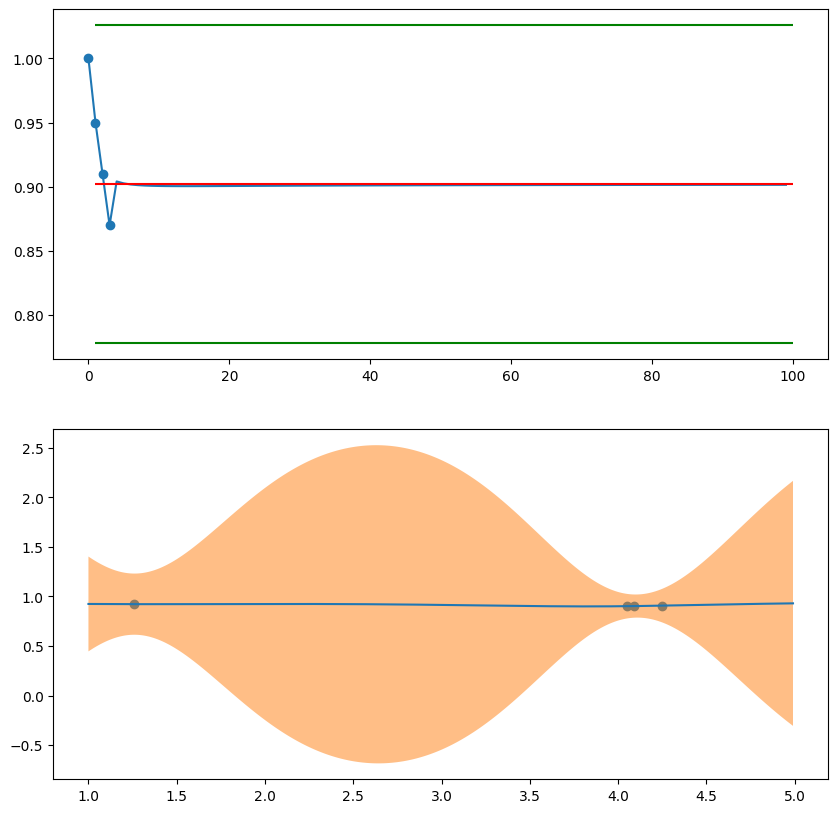

0.9458333333333333g 1000/1000
0.9458333333333333
0.8847516983932814baskets 7/13               
0.8847516983932814
0.9652718170861369
0.9652718170861369
0.8021119783043552
0.8021119783043552
0.8298547416444209
0.8298547416444209
1.1075575501168955
1.1075575501168955
0.890980756852743
0.890980756852743
0.9196735000932277
0.9196735000932277
1.147255955930541
1.147255955930541
0.880350601767453
0.880350601767453
0.7692054227706894
0.7692054227706894
1.351276172099671
1.351276172099671
1.1010340030239951
1.1010340030239951
0.9985159450253154
0.9985159450253154
1.0206378662326694
1.0206378662326694
1.1790653394196977
1.1790653394196977
1.0612775613983925
1.0612775613983925
0.8632799815041133
0.8632799815041133
1.0217881322927977
1.0217881322927977
0.9105325123445315
0.9105325123445315
1.0196467177324064
1.0196467177324064
0.9112047568787306
0.9112047568787306
1.0211243963962555
1.0211243963962555
0.9423899204494867
0.9423899204494867
0.9090623359991596
0.9090623359991596
0.835107788018565
0.

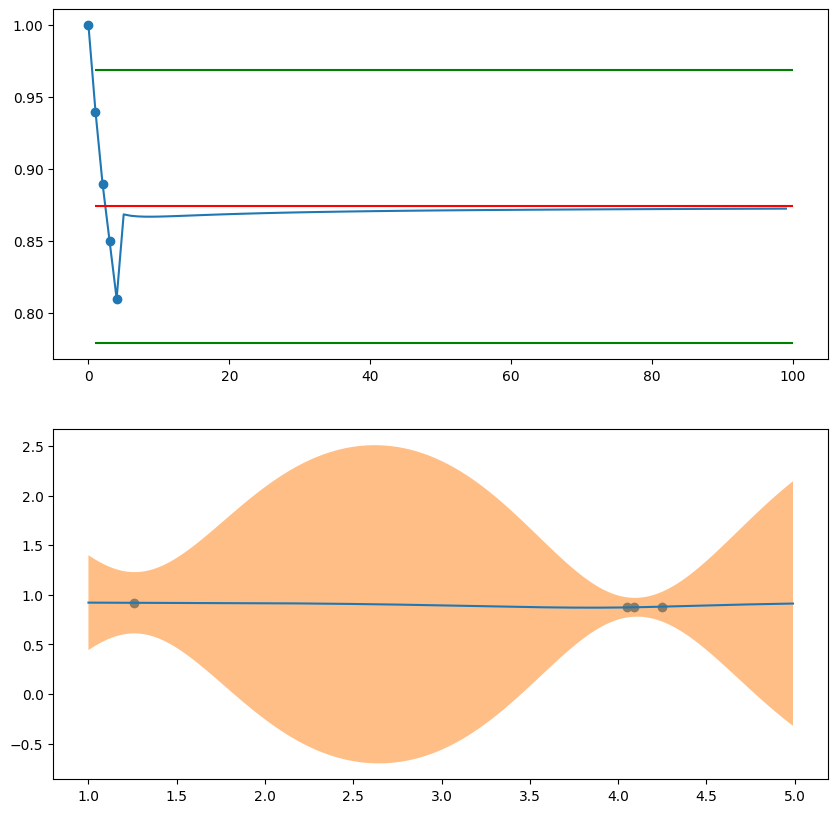

0.9292857142857143g 1000/1000
0.9292857142857143
0.8537240414068377baskets 7/13               
0.8537240414068377
0.9385700863304092
0.9385700863304092
0.6877647577158164
0.6877647577158164
1.0703350512041758
1.0703350512041758
0.999402834317215
0.999402834317215
0.9256494406390499
0.9256494406390499
1.0529185409226596
1.0529185409226596
1.1162877183307618
1.1162877183307618
0.8400642831697432
0.8400642831697432
0.9649194616587005
0.9649194616587005
0.7626467465817361
0.7626467465817361
0.8344940374738067
0.8344940374738067
0.8923871477344684
0.8923871477344684
0.9178435599983042
0.9178435599983042
0.9422741604534927
0.9422741604534927
0.8546038360139522
0.8546038360139522
0.929759329501132
0.929759329501132
1.0112924839312811
1.0112924839312811
0.9132539310924805
0.9132539310924805
0.9151665749185612
0.9151665749185612
0.9835142548172453
0.9835142548172453
1.0066313723847018
1.0066313723847018
0.8761911693784298
0.8761911693784298
1.046313061037694
1.046313061037694
0.9020612987782994

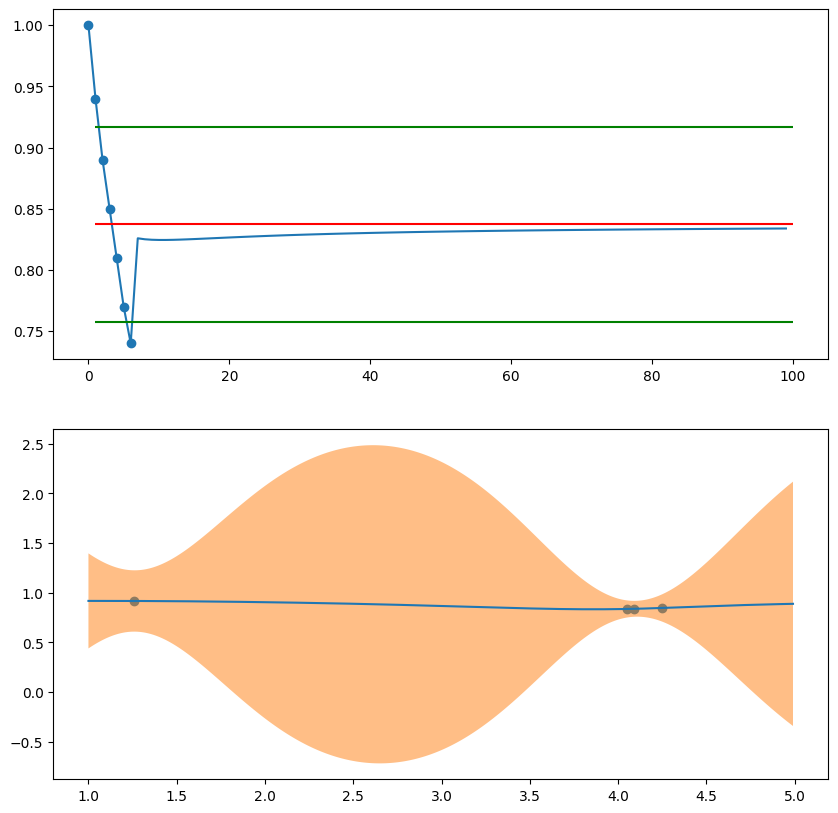

0.9075000000000001g 1000/1000
0.9075000000000001
0.7966984167476823baskets 7/13               
0.7966984167476823
0.9947698879718507
0.9947698879718507
0.8641538259090809
0.8641538259090809
0.8507149494295105
0.8507149494295105
0.8075808240464109
0.8075808240464109
0.9462821653115994
0.9462821653115994
1.0298418338177522
1.0298418338177522
0.7705963903590122
0.7705963903590122
0.9349039113857294
0.9349039113857294
0.8638608662933347
0.8638608662933347
0.9391054369307922
0.9391054369307922
1.0036198428049887
1.0036198428049887
0.8675869291907428
0.8675869291907428
0.7810666255828476
0.7810666255828476
0.919246082666397
0.919246082666397
1.0151480942305875
1.0151480942305875
0.8853424676893139
0.8853424676893139
0.9320729633497916
0.9320729633497916
1.0016384174906383
1.0016384174906383
1.041525277183081
1.041525277183081
0.9394879755493106
0.9394879755493106
0.9447792667928891
0.9447792667928891
0.9192283169906997
0.9192283169906997
0.9409814225520327
0.9409814225520327
0.79710732842514

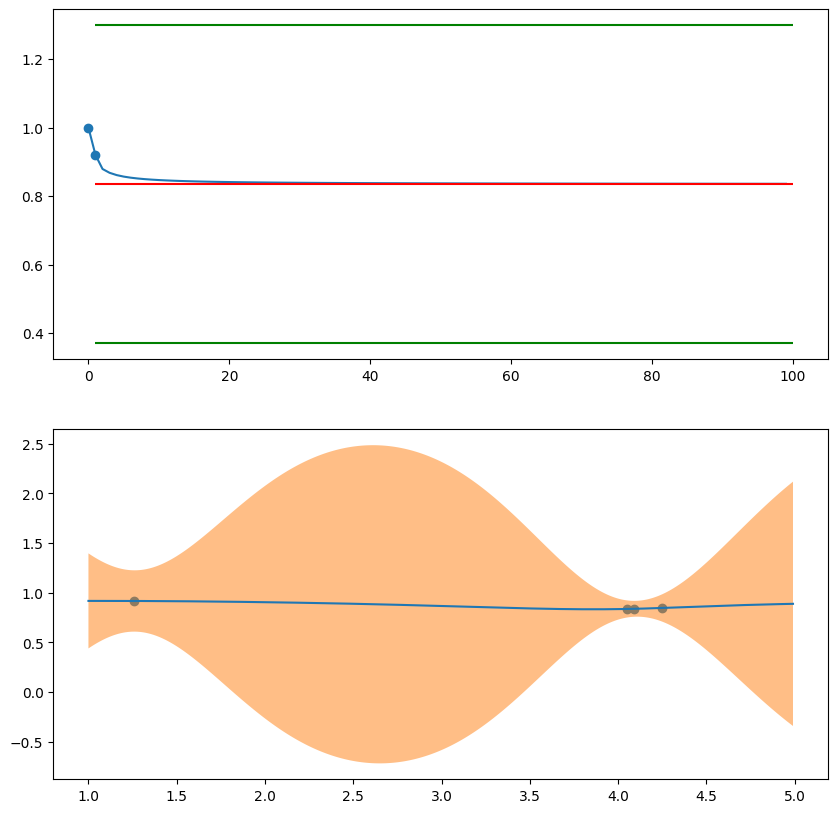

0.9133333333333334g 1000/1000
0.9133333333333334
0.9783625724067375baskets 7/13               
0.9783625724067375
0.9406033482762204
0.9406033482762204
0.8220286996513323
0.8220286996513323
0.8357494794766808
0.8357494794766808
1.0426696262783817
1.0426696262783817
0.8975368737636071
0.8975368737636071
0.8078091832556866
0.8078091832556866
0.9034084962905299
0.9034084962905299
0.9732563444792592
0.9732563444792592
0.9433296556209813
0.9433296556209813
0.6864389874358898
0.6864389874358898
1.0577465699143842
1.0577465699143842
0.9628910719120432
0.9628910719120432
0.870642401975025
0.870642401975025
0.7268709269475578
0.7268709269475578
1.0059863790185095
1.0059863790185095
0.9489426531216523
0.9489426531216523
0.9113614740678608
0.9113614740678608
1.0255582255515872
1.0255582255515872
0.8445877015404948
0.8445877015404948
0.94952992748275
0.94952992748275
0.9746025174364666
0.9746025174364666
0.9125685613356833
0.9125685613356833
0.8883581626709406
0.8883581626709406
0.9349851108414429

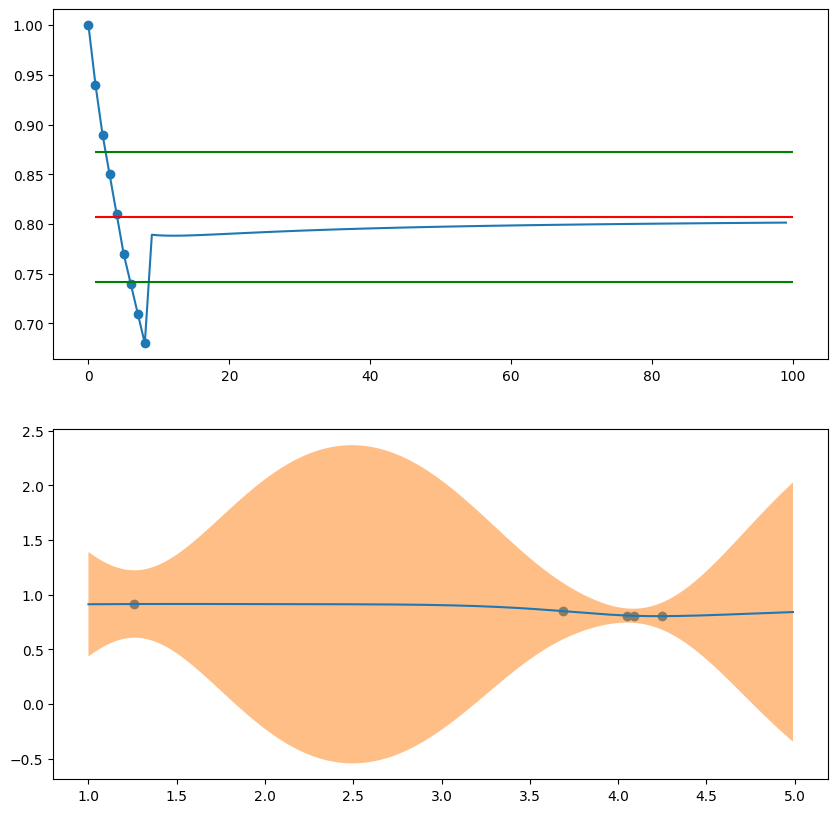

0.8915000000000001g 1000/1000
0.8915000000000001
0.9179949151152087baskets 8/13               
0.9179949151152087
0.906952711457059
0.906952711457059
0.9500275476603645
0.9500275476603645
0.9621873683264996
0.9621873683264996
0.8528781578924597
0.8528781578924597
1.098314989110877
1.098314989110877
0.9905330936198685
0.9905330936198685
0.9457329523869493
0.9457329523869493
0.9036755640632492
0.9036755640632492
0.8473819288790593
0.8473819288790593
0.7566613777560136
0.7566613777560136
0.9414845473743441
0.9414845473743441
1.0285019357430174
1.0285019357430174
0.7991929764673309
0.7991929764673309
0.9267256489368652
0.9267256489368652
0.8072614829807666
0.8072614829807666
0.8279945062943356
0.8279945062943356
0.9087205273172738
0.9087205273172738
0.9143577116230361
0.9143577116230361
0.8613912187054396
0.8613912187054396
0.8732778363900102
0.8732778363900102
0.8874764926703665
0.8874764926703665
1.0163917377798426
1.0163917377798426
0.8093574913366641
0.8093574913366641
0.99900285814081

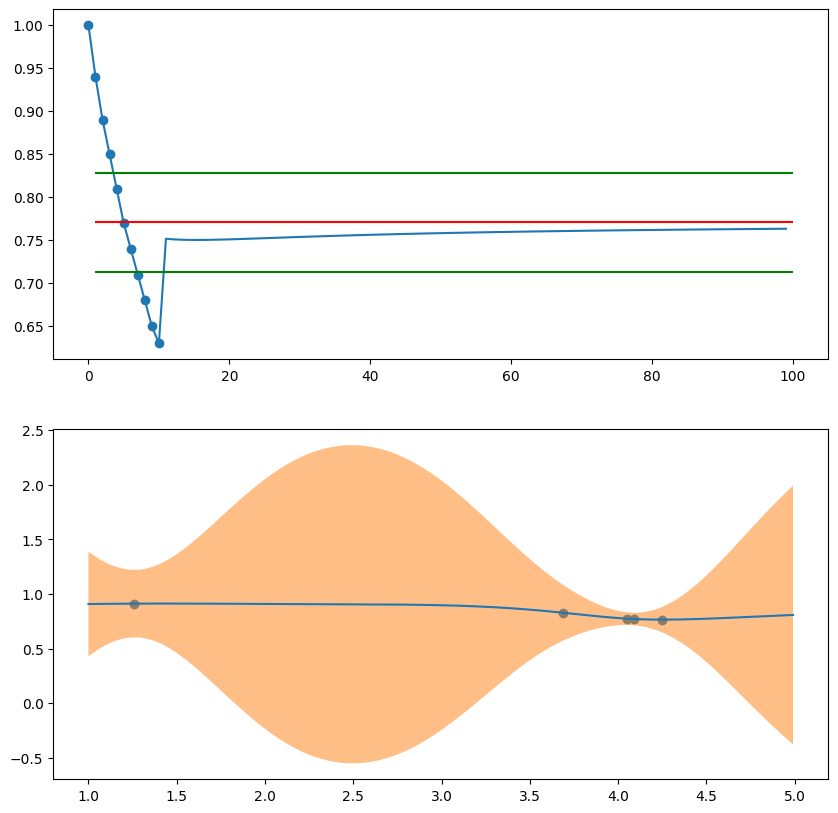

0.8686363636363637g 1000/1000
0.8686363636363637
0.849684922556119 baskets 8/13               
0.849684922556119
0.8968294403027411
0.8968294403027411
0.7557047936179276
0.7557047936179276
0.8272391323961292
0.8272391323961292
0.8713189219486575
0.8713189219486575
0.9424205043370154
0.9424205043370154
0.8449983939811879
0.8449983939811879
1.0181258235799024
1.0181258235799024
0.9699143410209294
0.9699143410209294
0.8053441586811605
0.8053441586811605
0.7296427003911532
0.7296427003911532
0.9727896361016107
0.9727896361016107
0.936498248434443
0.936498248434443
0.9014175744709046
0.9014175744709046
0.9373028037579457
0.9373028037579457
0.7826902439473309
0.7826902439473309
0.9264660901149782
0.9264660901149782
0.9631977277149547
0.9631977277149547
0.8195331726463335
0.8195331726463335
0.8743364569028967
0.8743364569028967
0.8643939360285741
0.8643939360285741
0.8846687899928724
0.8846687899928724
0.8829747643349473
0.8829747643349473
0.8445323679984872
0.8445323679984872
0.9041624263848

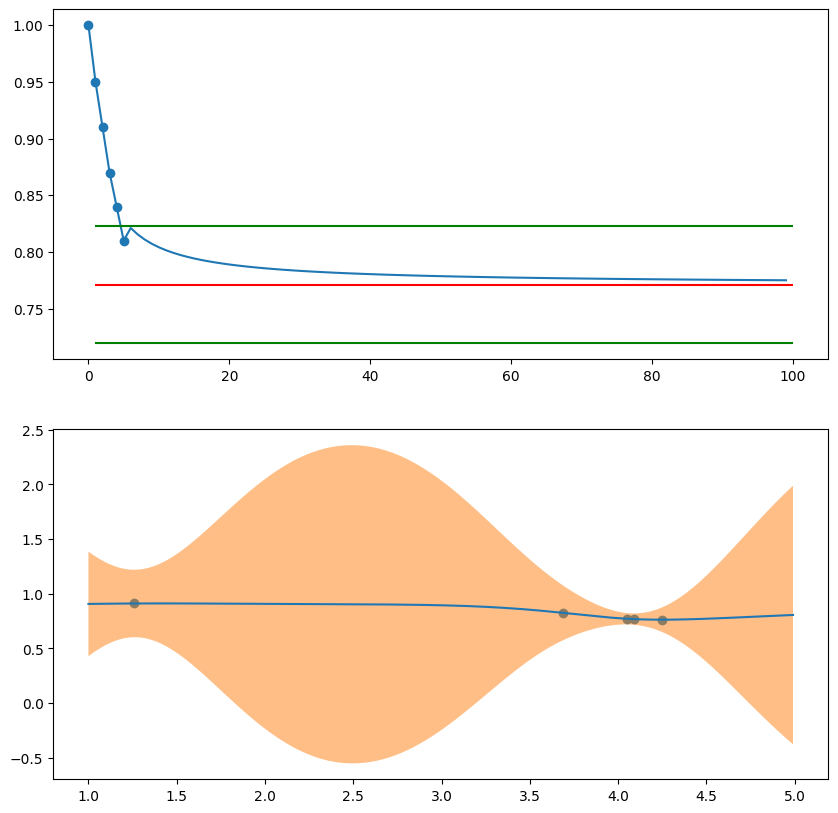

0.8650000000000001g 1000/1000
0.8650000000000001
0.8716452462620257baskets 8/13               
0.8716452462620257
0.889402379076545
0.889402379076545
0.9170141111918344
0.9170141111918344
0.8559175863435805
0.8559175863435805
0.8857026778269186
0.8857026778269186
0.9411584866158343
0.9411584866158343
0.9444830334827811
0.9444830334827811
0.9397825883081979
0.9397825883081979
0.8616361397390387
0.8616361397390387
0.7887289311832107
0.7887289311832107
0.8604006632208411
0.8604006632208411
0.9209980914842717
0.9209980914842717
0.8210888226584027
0.8210888226584027
0.7402951877660845
0.7402951877660845
0.8589140482020196
0.8589140482020196
0.8745885412148302
0.8745885412148302
0.8645647390241495
0.8645647390241495
0.8551292668669608
0.8551292668669608
0.7879356075420614
0.7879356075420614
0.9209888262768916
0.9209888262768916
0.843708784210381
0.843708784210381
0.9466274041614748
0.9466274041614748
0.845722675410536
0.845722675410536
0.7549943084692843
0.7549943084692843
0.9985821923559555

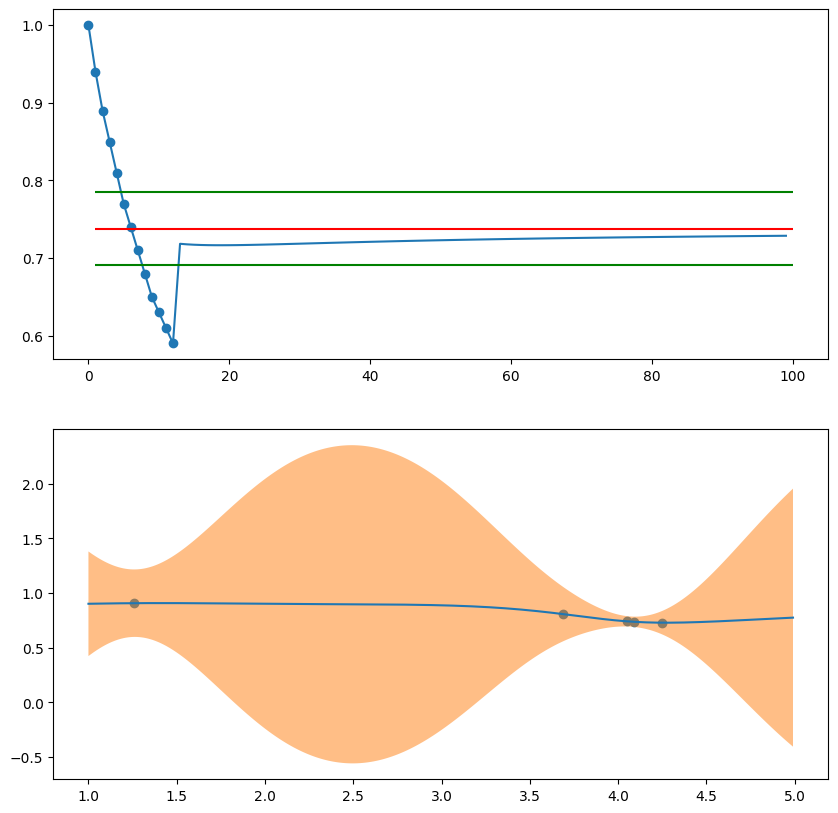

0.8446153846153847g 1000/1000
0.8446153846153847
0.9089412839959191baskets 8/13               
0.9089412839959191
0.8370668468331742
0.8370668468331742
0.8444741572152771
0.8444741572152771
0.855473604139739
0.855473604139739
0.9479808059238806
0.9479808059238806
0.805422417270452
0.805422417270452
0.81391147194467
0.81391147194467
0.8938640487141184
0.8938640487141184
0.8808296729245336
0.8808296729245336
0.8086126808988989
0.8086126808988989
0.7723717741911619
0.7723717741911619
0.7787674627676754
0.7787674627676754
0.9470697572614599
0.9470697572614599
0.8041348968441338
0.8041348968441338
0.8791413602738919
0.8791413602738919
0.904509450360069
0.904509450360069
0.8088998949817782
0.8088998949817782
0.8269736823231735
0.8269736823231735
0.7557169291423048
0.7557169291423048
0.8659861259104151
0.8659861259104151
0.8671699050525673
0.8671699050525673
0.8519658176598222
0.8519658176598222
0.8533270582884711
0.8533270582884711
0.8898317481552885
0.8898317481552885
0.8023009874836896
0.8

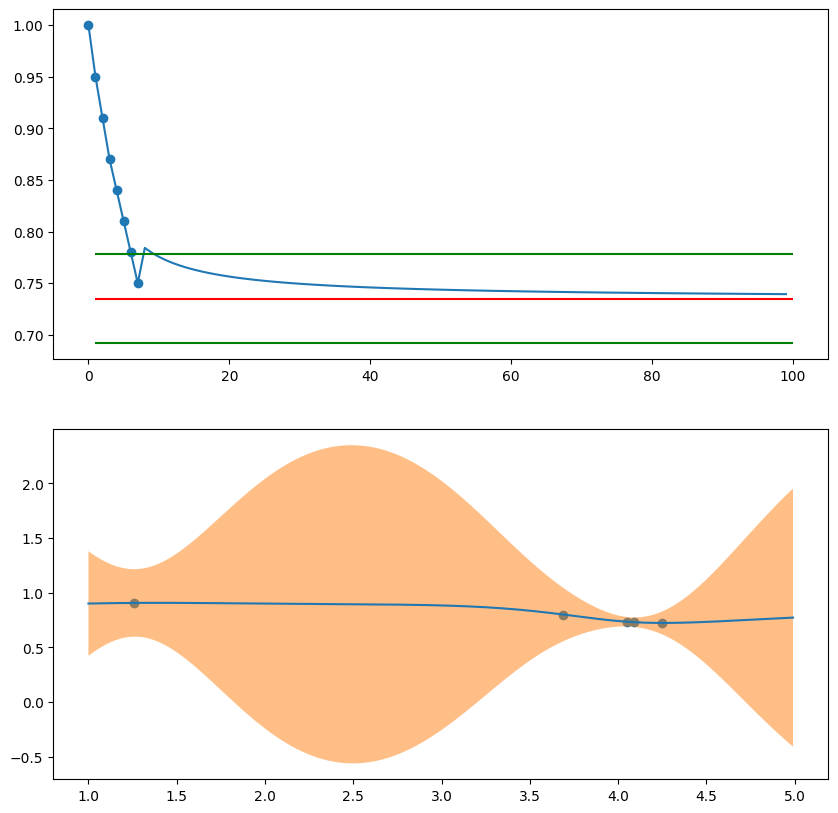

0.8389285714285715g 1000/1000
0.8389285714285715
0.7953326205875321baskets 8/13               
0.7953326205875321
0.8950909017513115
0.8950909017513115
0.8583558250987987
0.8583558250987987
0.9090091605625769
0.9090091605625769
0.6644729896945208
0.6644729896945208
0.8565088981751754
0.8565088981751754
0.7627603320935019
0.7627603320935019
0.772211833815552
0.772211833815552
0.8633083612115696
0.8633083612115696
0.8698991285658048
0.8698991285658048
0.7880758668627256
0.7880758668627256
0.8098986864066965
0.8098986864066965
0.7769719204066953
0.7769719204066953
0.9752590549391567
0.9752590549391567
0.83101745628326
0.83101745628326
0.8514127083963321
0.8514127083963321
0.8518927813289883
0.8518927813289883
0.853334984562371
0.853334984562371
0.791325922393368
0.791325922393368
0.8896897704581045
0.8896897704581045
0.8823850676339811
0.8823850676339811
0.8562622625114059
0.8562622625114059
0.8593223071796081
0.8593223071796081
0.707199329125789
0.707199329125789
0.8747515852171918
0.874

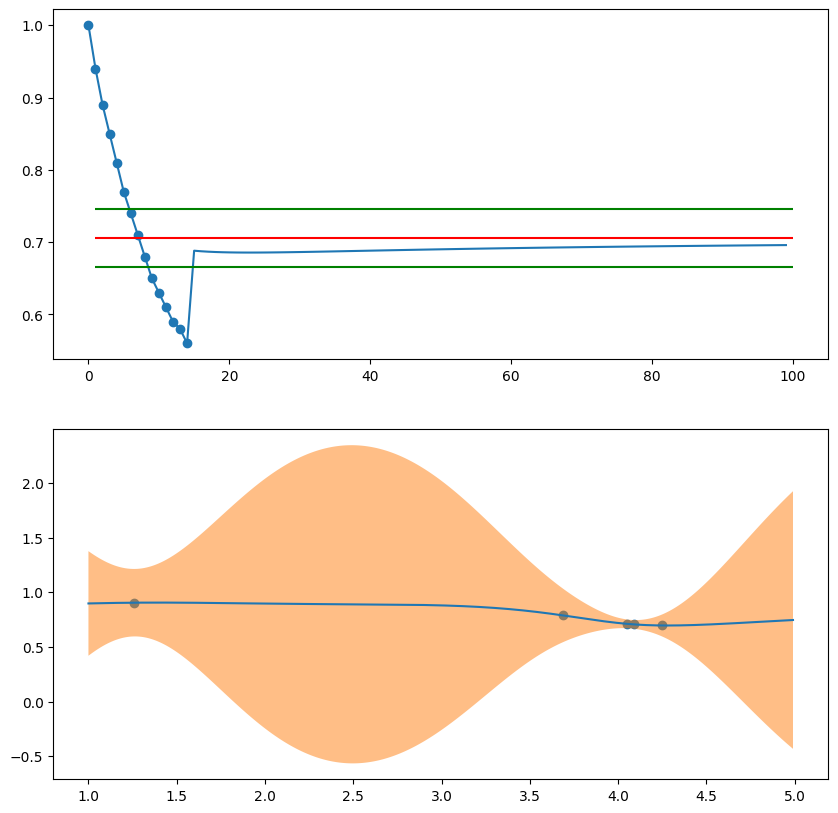

0.8210000000000001g 1000/1000
0.8210000000000001
0.8057268737576706baskets 7/13               
0.8057268737576706
0.7467555138912988
0.7467555138912988
0.8715121105087001
0.8715121105087001
0.7902859393671433
0.7902859393671433
0.8378678145124965
0.8378678145124965
0.803667218503346
0.803667218503346
0.9338945843518912
0.9338945843518912
0.8313757528932307
0.8313757528932307
0.8807798793562224
0.8807798793562224
0.7215764732079761
0.7215764732079761
0.8512234910537777
0.8512234910537777
0.8725697909697421
0.8725697909697421
0.8896915724539557
0.8896915724539557
0.8426489173195327
0.8426489173195327
0.7223161513782499
0.7223161513782499
0.8522669295135569
0.8522669295135569
0.7578904595886613
0.7578904595886613
0.8059765893953384
0.8059765893953384
0.8042471837877576
0.8042471837877576
0.7882873590446607
0.7882873590446607
0.7721671190712156
0.7721671190712156
0.9009431910275165
0.9009431910275165
0.806020713155279
0.806020713155279
0.8386674108417147
0.8386674108417147
0.82320971648530

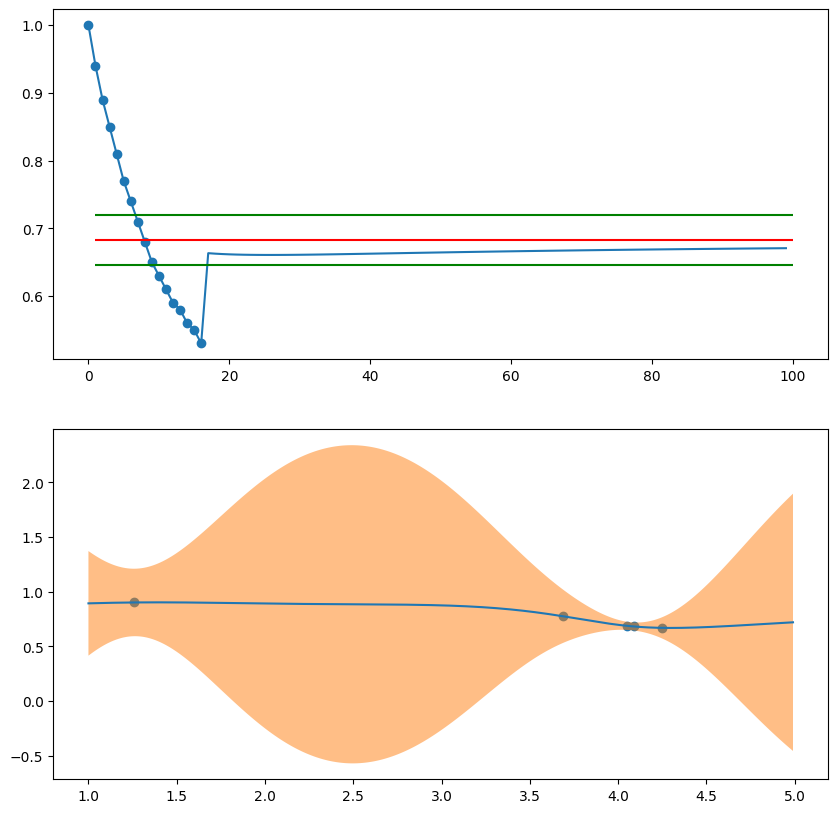

0.8034375new config 1000/1000
0.8034375
0.8541861848953967baskets 7/13               
0.8541861848953967
0.9782406098849684
0.9782406098849684
0.8583264430448895
0.8583264430448895
0.808466656680148
0.808466656680148
0.7634154127100713
0.7634154127100713
0.7668006559356985
0.7668006559356985
0.8815132535449111
0.8815132535449111
0.8212926125242063
0.8212926125242063
0.6988002895281238
0.6988002895281238
0.8052455372662406
0.8052455372662406
0.8319384188323946
0.8319384188323946
0.8512834579472371
0.8512834579472371
0.7541515800241655
0.7541515800241655
0.8318311576994138
0.8318311576994138
0.793595826731829
0.793595826731829
0.8049068121489462
0.8049068121489462
0.7763425586108679
0.7763425586108679
0.7887198040120417
0.7887198040120417
0.7475104084164632
0.7475104084164632
0.8163315237161115
0.8163315237161115
0.7641438898262819
0.7641438898262819
0.7297338409163949
0.7297338409163949
0.7857316732041894
0.7857316732041894
0.8127363228535691
0.8127363228535691
0.7463282178349195
0.7463

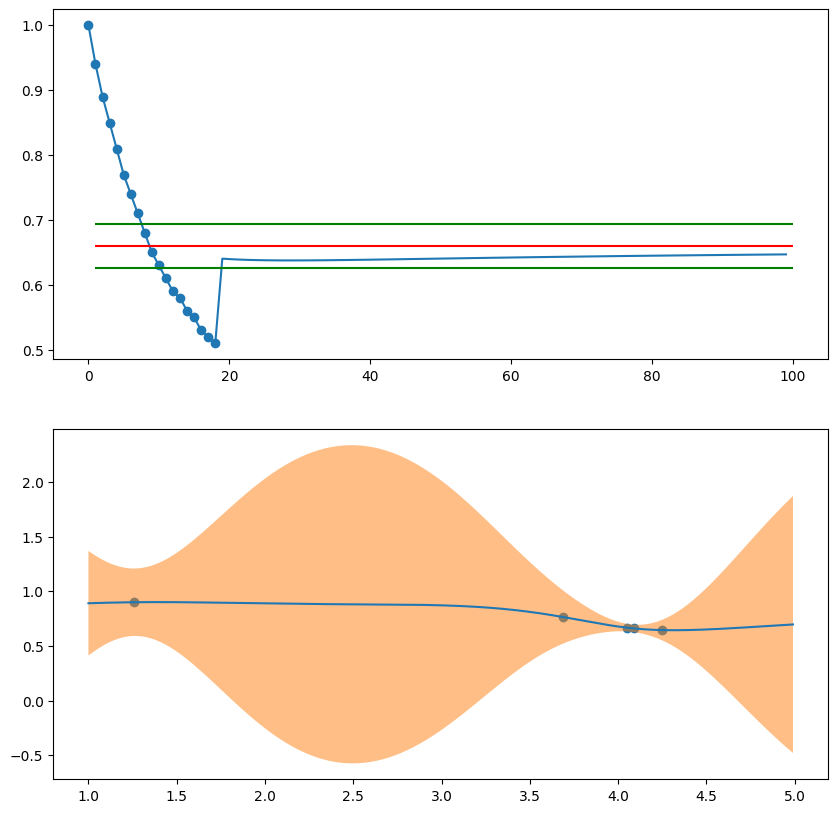

0.7864705882352941g 1000/1000
0.7864705882352941
0.8427762864521865baskets 7/13               
0.8427762864521865
0.7494083857925492
0.7494083857925492
0.7667866866129089
0.7667866866129089
0.6854260690121262
0.6854260690121262
0.7947869495073516
0.7947869495073516
0.8658820227591397
0.8658820227591397
0.7320061230298679
0.7320061230298679
0.8127304862935527
0.8127304862935527
0.7912726632296494
0.7912726632296494
0.7302410722918334
0.7302410722918334
0.8883839660014723
0.8883839660014723
0.7862820288140503
0.7862820288140503
0.7668219356259194
0.7668219356259194
0.8009943046835111
0.8009943046835111
0.8163635130394493
0.8163635130394493
0.7745344720870749
0.7745344720870749
0.7388355623947302
0.7388355623947302
0.8120739512291782
0.8120739512291782
0.7326623738137759
0.7326623738137759
0.7830646214239589
0.7830646214239589
0.8802708289182376
0.8802708289182376
0.7807232458755681
0.7807232458755681
0.7458408754637699
0.7458408754637699
0.7376082657318827
0.7376082657318827
0.8061863760

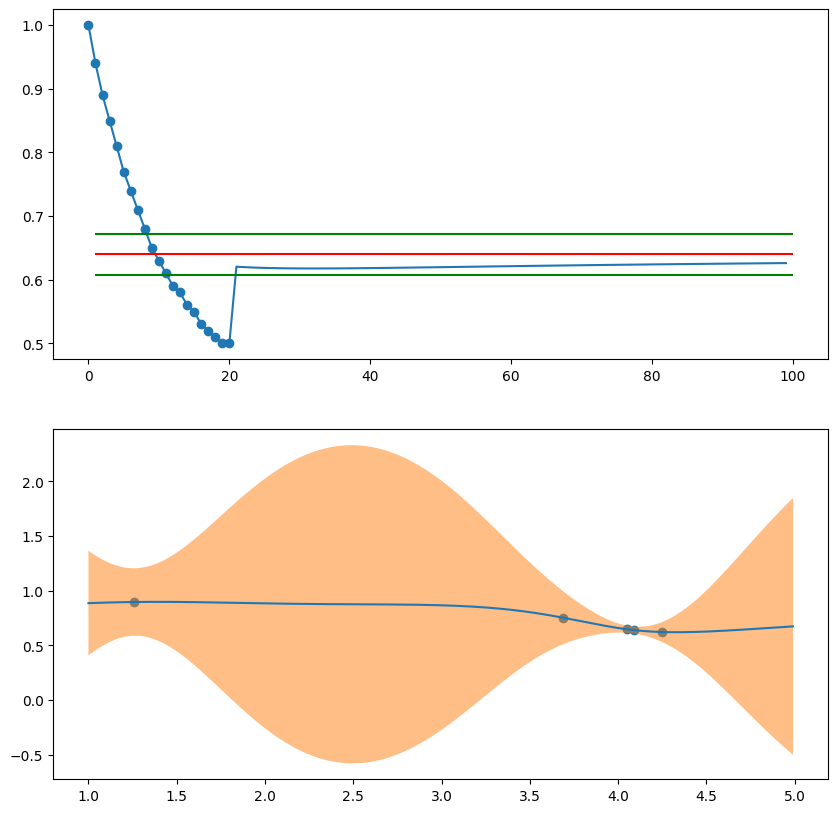

0.7705555555555557g 1000/1000
0.7705555555555557
0.7303476715352277baskets 8/13               
0.7303476715352277
0.7494925772292733
0.7494925772292733
0.7642765566052158
0.7642765566052158
0.7078873016889179
0.7078873016889179
0.7608717858729745
0.7608717858729745
0.7593612766385472
0.7593612766385472
0.7409028132735466
0.7409028132735466
0.7166203902156818
0.7166203902156818
0.7032732092683635
0.7032732092683635
0.7925794728713556
0.7925794728713556
0.8066158071713565
0.8066158071713565
0.7500459213924794
0.7500459213924794
0.8511761484600056
0.8511761484600056
0.8280498457911527
0.8280498457911527
0.7516990876201296
0.7516990876201296
0.774925556826742
0.774925556826742
0.7826164426890466
0.7826164426890466
0.7610706517897461
0.7610706517897461
0.7926074501389172
0.7926074501389172
0.7695898178257896
0.7695898178257896
0.8379251606589094
0.8379251606589094
0.7849955745415178
0.7849955745415178
0.7414233076549421
0.7414233076549421
0.7342853146911718
0.7342853146911718
0.798974773762

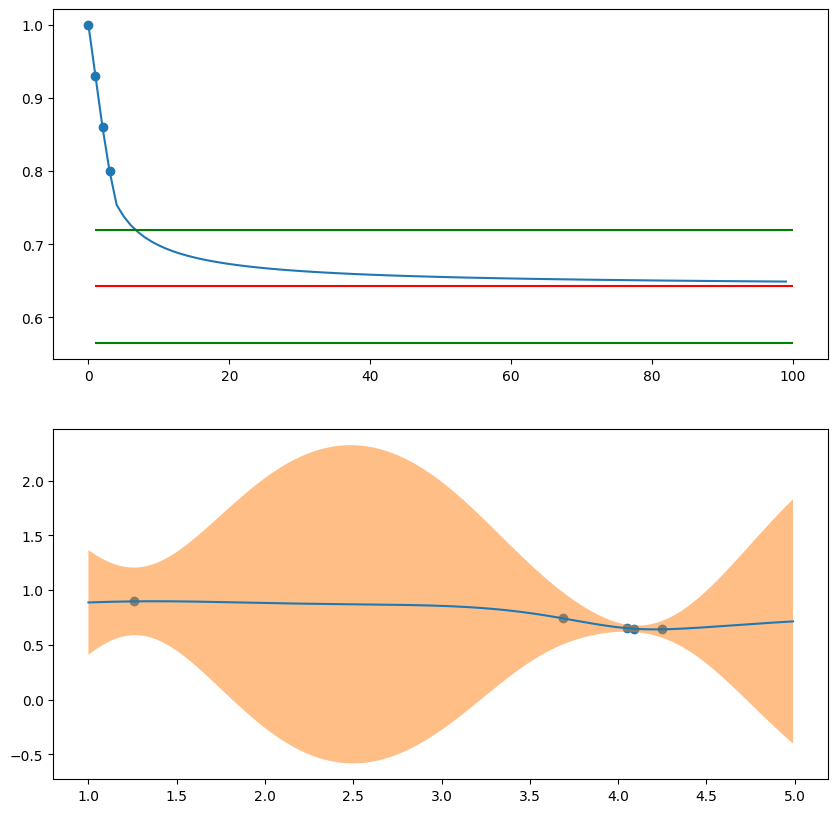

0.7736842105263159g 1000/1000
0.7736842105263159
0.7930207631844515baskets 8/13               
0.7930207631844515
0.7434048865220916
0.7434048865220916
0.7994273399461795
0.7994273399461795
0.7600743735132304
0.7600743735132304
0.8263269928984336
0.8263269928984336
0.74308206342074
0.74308206342074
0.8069129023758425
0.8069129023758425
0.7828409770861453
0.7828409770861453
0.7053716389194866
0.7053716389194866
0.7789579583274384
0.7789579583274384
0.7500330073374644
0.7500330073374644
0.7837253284807114
0.7837253284807114
0.6462884983388533
0.6462884983388533
0.8127398750905293
0.8127398750905293
0.7604967866994465
0.7604967866994465
0.7654376359808979
0.7654376359808979
0.7704090335334632
0.7704090335334632
0.7499138935924664
0.7499138935924664
0.7976443630433756
0.7976443630433756
0.8031002265300302
0.8031002265300302
0.8147107483784634
0.8147107483784634
0.7987894977968688
0.7987894977968688
0.7763451349876717
0.7763451349876717
0.7873073159534842
0.7873073159534842
0.77838177681601

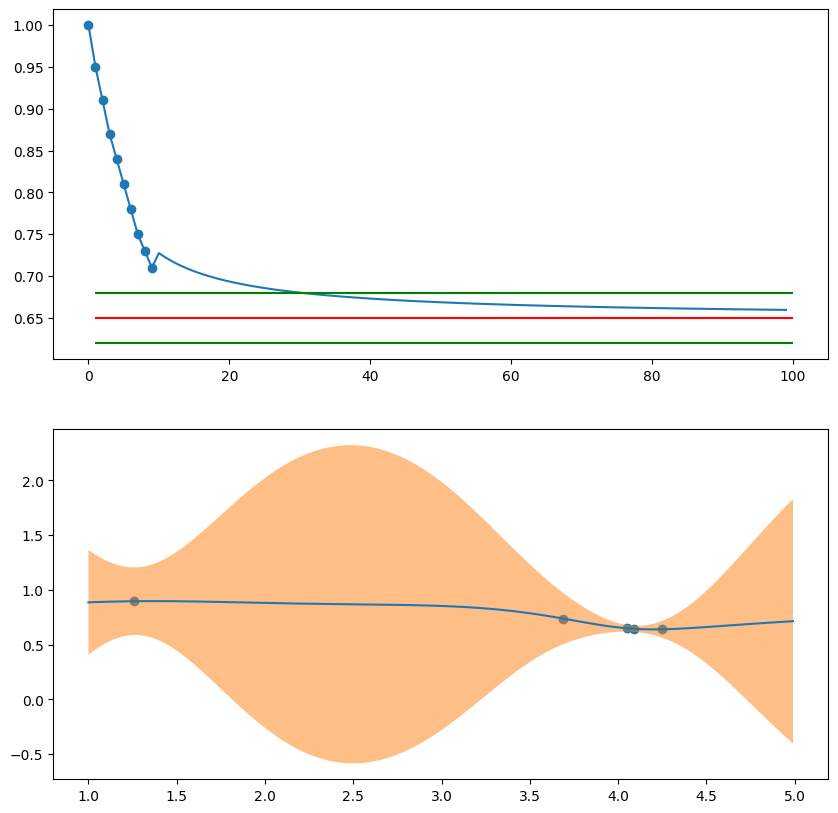

0.771ing new config 1000/1000
0.771
0.7362856539798107baskets 8/13               
0.7362856539798107
0.8279808090789434
0.8279808090789434
0.7516029404783285
0.7516029404783285
0.7994522688965288
0.7994522688965288
0.732978533663701
0.732978533663701
0.9001121691439752
0.9001121691439752
0.7015069260023257
0.7015069260023257
0.6595030035342936
0.6595030035342936
0.7347933710665727
0.7347933710665727
0.7969272436616173
0.7969272436616173
0.791302194635376
0.791302194635376
0.721268415074187
0.721268415074187
0.7984856037461779
0.7984856037461779
0.762153961657838
0.762153961657838
0.7033159118864004
0.7033159118864004
0.7757014059587201
0.7757014059587201
0.7427428820768588
0.7427428820768588
0.7783937744559792
0.7783937744559792
0.7493636784998023
0.7493636784998023
0.7347349867830777
0.7347349867830777
0.7754004449751781
0.7754004449751781
0.7027027678341988
0.7027027678341988
0.7948385556125063
0.7948385556125063
0.7553659611243833
0.7553659611243833
0.7632617630783107
0.763261763078

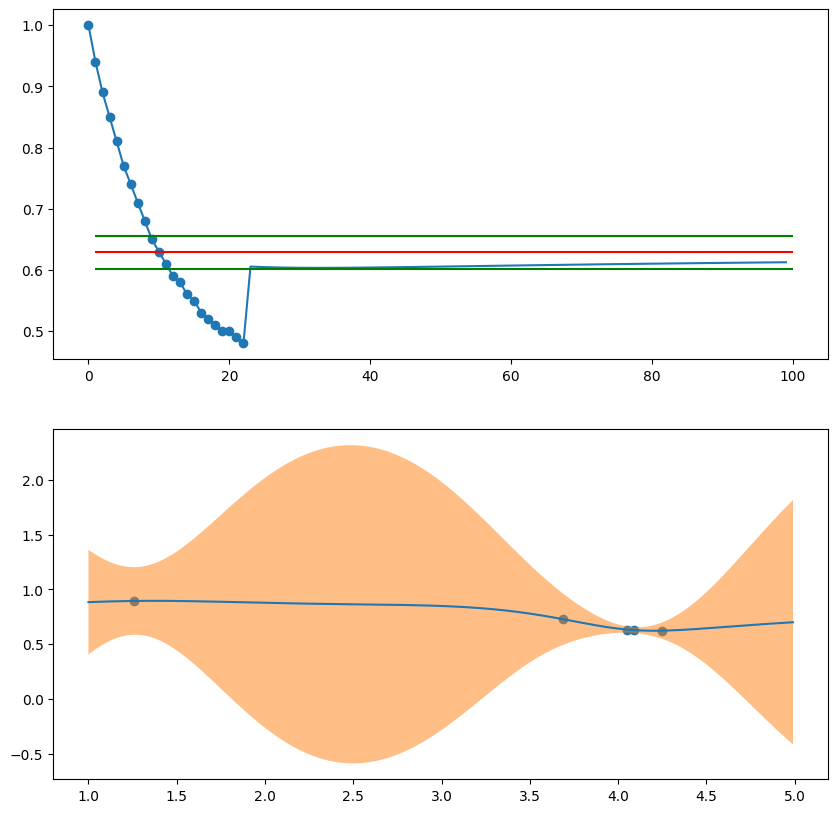

0.7573809523809525g 1000/1000
0.7573809523809525
0.7489229360372488baskets 8/13               
0.7489229360372488
0.7532224281099272
0.7532224281099272
0.7407405550684552
0.7407405550684552
0.7267475920370139
0.7267475920370139
0.7077860742597791
0.7077860742597791
0.7684464287004236
0.7684464287004236
0.8339056338678364
0.8339056338678364
0.7864196125526054
0.7864196125526054
0.818652043410676
0.818652043410676
0.8143136095043716
0.8143136095043716
0.7623948198694822
0.7623948198694822
0.7604938760573557
0.7604938760573557
0.6941079880702288
0.6941079880702288
0.8139524887786201
0.8139524887786201
0.7158930214178879
0.7158930214178879
0.7320496676096547
0.7320496676096547
0.7275810905437049
0.7275810905437049
0.7624708618075537
0.7624708618075537
0.7699036892031951
0.7699036892031951
0.7656075486552947
0.7656075486552947
0.8071131968499887
0.8071131968499887
0.7934212072583534
0.7934212072583534
0.751400925764672
0.751400925764672
0.8071242689888378
0.8071242689888378
0.78263827334924

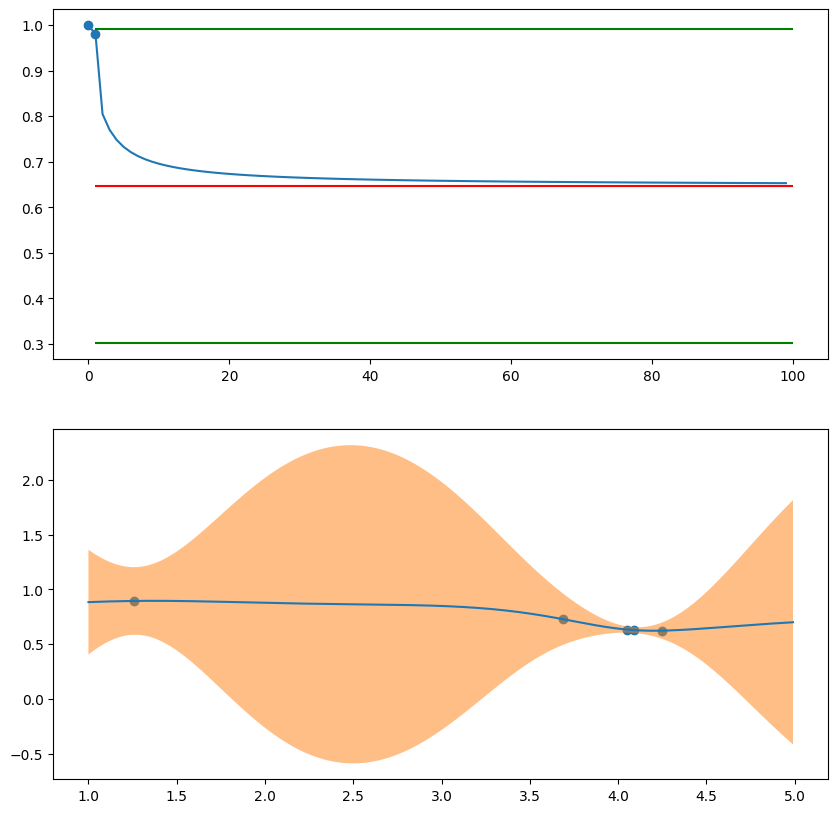

0.7679545454545454g 1000/1000
0.7679545454545454
0.7623103530939577baskets 9/13               
0.7623103530939577
0.8072572380523124
0.8072572380523124
0.7965230618820346
0.7965230618820346
0.7834177901276157
0.7834177901276157
0.7889555787029056
0.7889555787029056
0.7766965952753845
0.7766965952753845
0.7414239701311317
0.7414239701311317
0.7615775153835834
0.7615775153835834
0.7636276459889941
0.7636276459889941
0.7474100808671524
0.7474100808671524
0.8443376770631331
0.8443376770631331
0.7586272786729505
0.7586272786729505
0.7208577981010614
0.7208577981010614
0.8032966285662696
0.8032966285662696
0.7781227184662529
0.7781227184662529
0.7375641285042763
0.7375641285042763
0.8002105808168636
0.8002105808168636
0.8016371953298934
0.8016371953298934
0.8016304641230497
0.8016304641230497
0.7400858076534401
0.7400858076534401
0.7296485466501249
0.7296485466501249
0.7979848292388424
0.7979848292388424
0.79096734708033
0.79096734708033
0.7595081145406859
0.7595081145406859
0.76353639226459

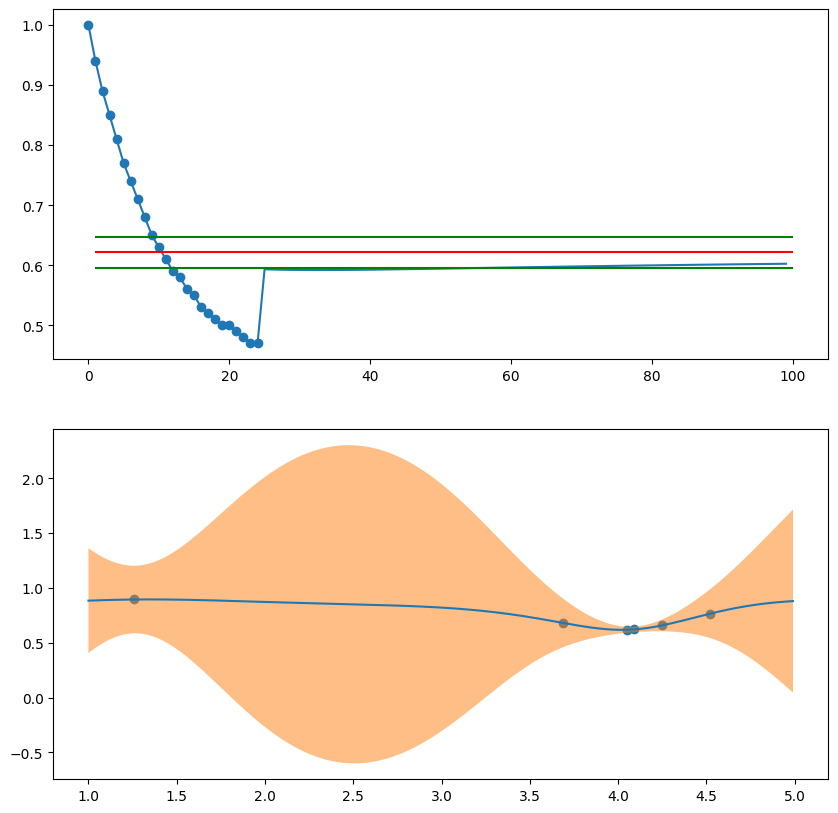

: 

In [2]:
N_INIT_CONFIGS=2 # number of random initializations for the optimization
N_INIT_EPOCHS=3 # number of epochs trained for initial configs
# INFERRED_MEAN = 0. # inferred mean of the global GP
bounds={'HP1':(1.,5.)}#,'HP2':(1.,5.)}
local_function=local_xD



l,d=init_configs(local_function,bounds,N_INIT_CONFIGS,N_INIT_EPOCHS)
# for k,e in d.items():
#     print(k,e)

for i in range(20):
    ft=FreezeThaw(bounds,l,d,noise=0.1)
    new_config,new_epochs=ft.iterate(pred_epoch=2)
    # print(new_config)
    # print(new_epochs)
    l,d=update_configs(local_function,l,d,new_config,new_epochs)
    # for k,e in d.items():
    #     print(k,e[0])
    if i%1==0:
        config_space=np.linspace(1,5,400,endpoint=False).reshape(-1,1)
        # print(ft.observed_configs_list)
        # print(config_space)
        # print(np.append(config_space,ft.observed_configs_list))
        print(new_config)
        mean_local,std_local=ft.predict_local(new_config,epochs=np.linspace(0,99,100))
        std_local=np.diag(std_local)
        # print(mean_local)
        # print(std_local)

        mean_prediction,std_prediction=ft.predict_global(np.append(config_space,ft.observed_configs_list).reshape(-1,1))

        fig, ax = plt.subplots(2,figsize=(10,10))
        ax[0].plot(np.linspace(0,99,100), mean_local, label="Mean prediction")
        # ax[0].fill_between(
        #     np.linspace(1,100,100).ravel(),
        #     mean_local - 1.96 * std_local,
        #     mean_local + 1.96 * std_local,
        #     alpha=0.5)
        ax[0].scatter(ft.observed_configs_dicts['_'.join([str(c) for c in new_config])][0], ft.observed_configs_dicts['_'.join([str(c) for c in new_config])][1], label="Observations")
        print(mean_prediction[int(new_config*100-100)])
        ax[0].hlines(mean_prediction[int(new_config*100-100)],1,100,colors='r')
        ax[0].hlines(mean_prediction[int(new_config*100-100)]+1.96*std_prediction[int(new_config*100-100)],1,100,colors='g')
        ax[0].hlines(mean_prediction[int(new_config*100-100)]-1.96*std_prediction[int(new_config*100-100)],1,100,colors='g')


        ax[1].scatter(ft.observed_configs_list, mean_prediction[400:], label="Observations")
        ax[1].plot(config_space, mean_prediction[:400], label="Mean prediction")
        ax[1].fill_between(
            config_space.ravel(),
            mean_prediction[:400] - 1.96 * std_prediction[:400],
            mean_prediction[:400] + 1.96 * std_prediction[:400],
            alpha=0.5)
        plt.show()
        plt.close()

